First 5 Rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies      

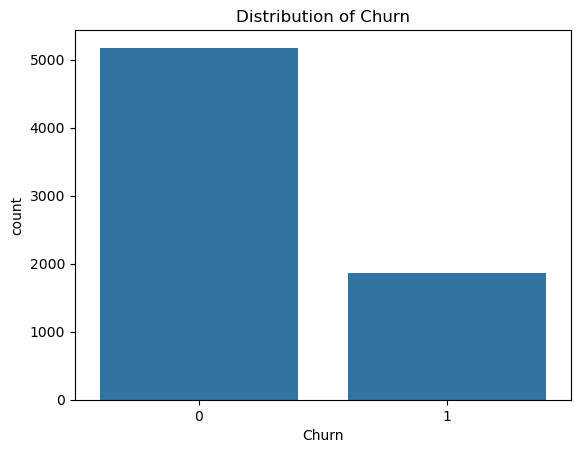

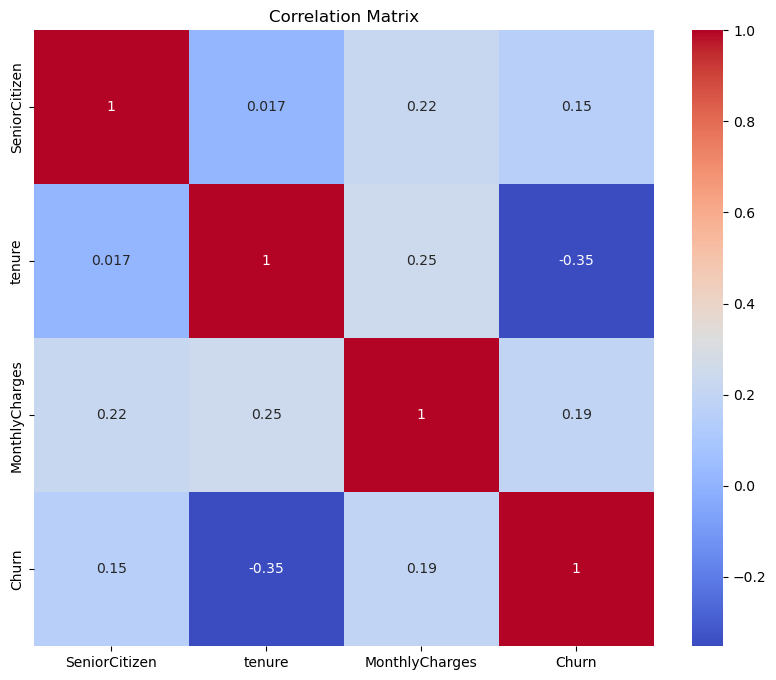

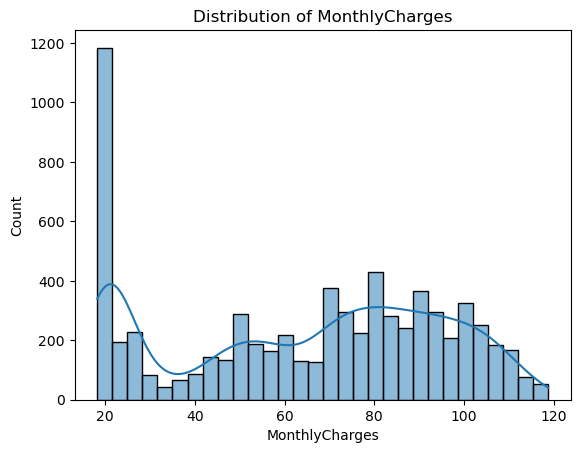

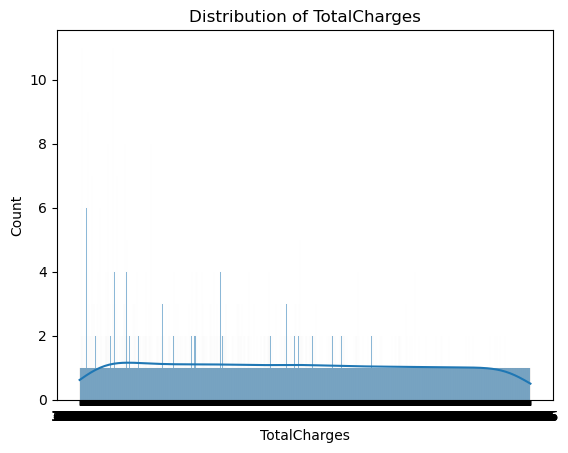

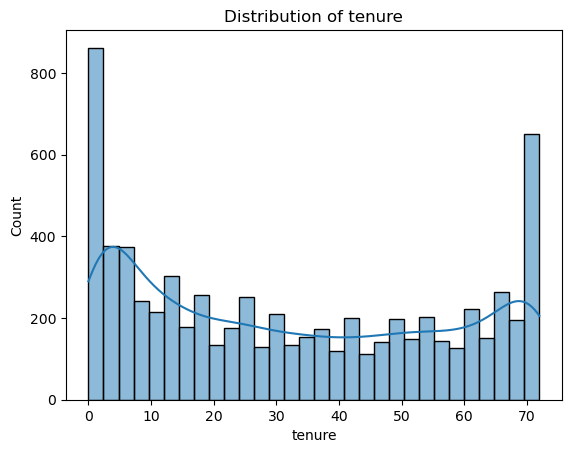

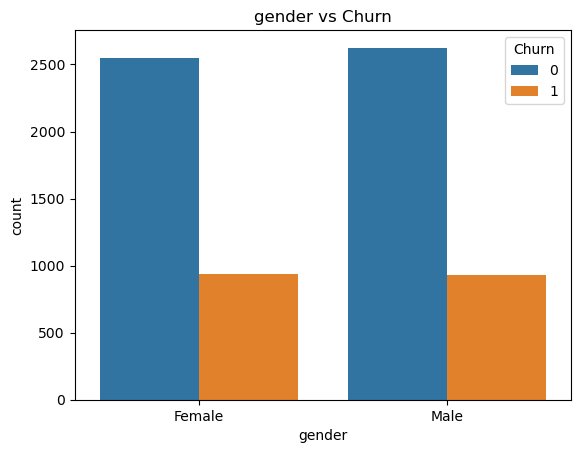

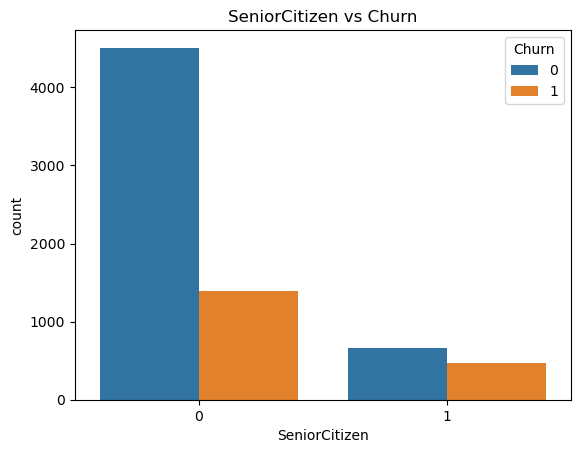

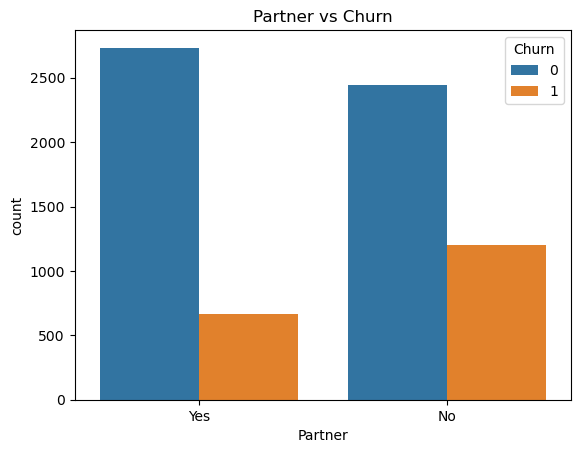

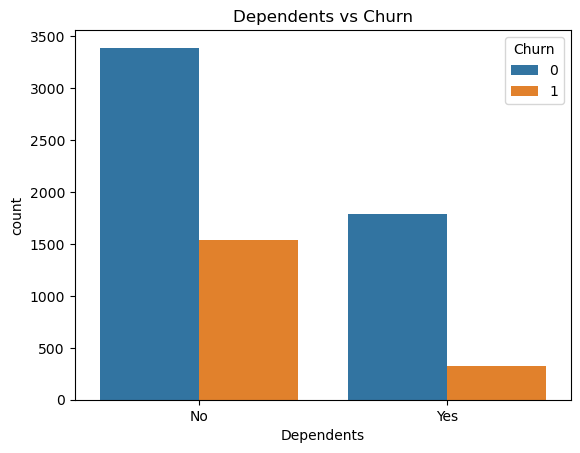

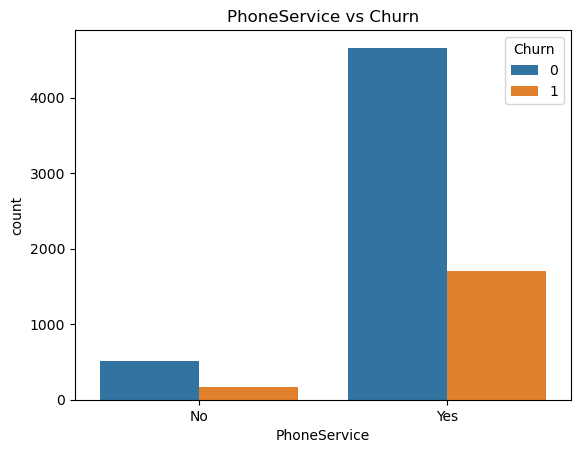

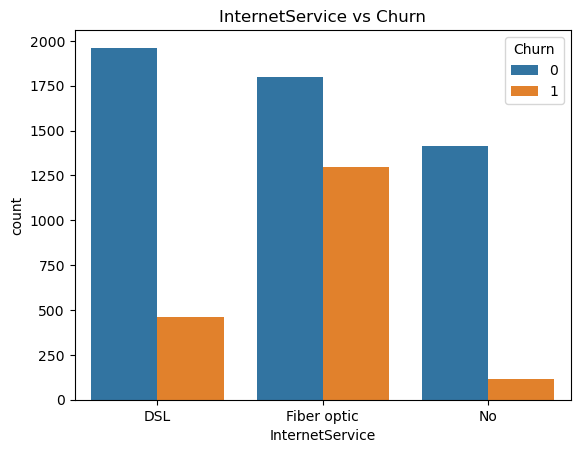

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
print("First 5 Rows:\n", data.head())

# Check dataset shape and data types
print("\nDataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)

# Get summary statistics
print("\nSummary Statistics:\n", data.describe(include='all'))

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Convert 'Churn' to binary (0: No, 1: Yes)
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Distribution of the target variable
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Correlation matrix heatmap
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature distributions
for column in ['MonthlyCharges', 'TotalCharges', 'tenure']:
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

# Categorical feature analysis
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'{feature} vs Churn')
    plt.show()